In [1]:
import os
import cv2
import torch
import torch.nn as nn
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
import timm
import time

c:\ProgramData\anaconda3\envs\deepfake\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA version:", torch.version.cuda)
    print("cuDNN version:", torch.backends.cudnn.version())
    print("GPU:", torch.cuda.get_device_name(0))
else:
    print("CUDA is NOT available. Check installation.")


Torch version: 2.6.0+cu118
CUDA available: True
CUDA version: 11.8
cuDNN version: 90100
GPU: NVIDIA GeForce RTX 3080 Ti Laptop GPU


In [3]:
import torch

print("CUDA Available:", torch.cuda.is_available())
print("Device Count:", torch.cuda.device_count())
print("Current Device:", torch.cuda.current_device())
print("GPU Name:", torch.cuda.get_device_name(0))


CUDA Available: True
Device Count: 1
Current Device: 0
GPU Name: NVIDIA GeForce RTX 3080 Ti Laptop GPU


## Dataset extracted from Celeb-DF Videos. DataLoader Creation

In [4]:
# Set paths and hyperparameters
frames_dir = r"C:\Users\saima\Desktop\code\DEEPFAKE\frames"
test_list_path = r"C:\Users\saima\Desktop\code\DEEPFAKE\List_of_testing_videos.txt"
batch_size = 32
learning_rate = 1e-4
num_epochs = 10
train_ratio = 0.7
val_ratio = 0.1
balance_ratio = 0.2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
print("Loading dataset...")
image_paths, labels = [], []
real_frames_dir = os.path.join(frames_dir, 'real')
fake_frames_dir = os.path.join(frames_dir, 'fake')

for frame in os.listdir(real_frames_dir):
    if frame.endswith('.jpg'):
        image_paths.append(os.path.join(real_frames_dir, frame))
        labels.append(0)

for frame in os.listdir(fake_frames_dir):
    if frame.endswith('.jpg'):
        image_paths.append(os.path.join(fake_frames_dir, frame))
        labels.append(1)


Using device: cuda
Loading dataset...


In [5]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create full dataset and split into train/validation/balance
full_dataset = [(image_paths[i], labels[i]) for i in range(len(image_paths))]
train_size = int(len(full_dataset) * train_ratio)
val_size = int(len(full_dataset) * val_ratio)
balance_size = len(full_dataset) - train_size - val_size
train_dataset, val_dataset, balance_dataset = random_split(full_dataset, [train_size, val_size, balance_size])

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
balance_loader = DataLoader(balance_dataset, batch_size=batch_size, shuffle=True, num_workers=4)


In [6]:
class DeepFakeDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        # Load image
        image = Image.open(image_path).convert("RGB")

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.long)

# Apply this dataset to your data splits
train_dataset = DeepFakeDataset(image_paths, labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)



In [7]:
for batch_idx, (inputs, targets) in enumerate(train_loader):
    print(f"Batch {batch_idx+1} loaded successfully!")
    print(f"Shape of inputs: {inputs.shape}")
    print(f"Shape of targets: {targets.shape}")
    break  # Stop after first batch


Batch 1 loaded successfully!
Shape of inputs: torch.Size([16, 3, 224, 224])
Shape of targets: torch.Size([16])


In [8]:
import torch
import torch.nn as nn
import timm
import time
import torch.backends.cudnn as cudnn

# Optimizations
cudnn.benchmark = True  

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model
print("Initializing ViT model...")
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=2)
model.to(device)

# Training parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
scaler = torch.cuda.amp.GradScaler()  # Enable AMP

# Best model tracking
best_val_acc = 0.0
best_model_path = "best_deepfake_detector.pth"


Initializing ViT model...


C:\Users\saima\AppData\Local\Temp\ipykernel_14512\793837816.py:21: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()  # Enable AMP


In [1]:
import torch
print(torch.__version__)


2.6.0+cu118


In [6]:
import os
import time
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from PIL import Image
import timm


# 🚀 Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define paths
DATASET_PATH = r"C:\Users\saima\Desktop\code\DEEPFAKE\frames"  # Change this to your dataset path
best_model_path = "best_model.pth"

# Define image transformations
#transform = transforms.Compose([
#    transforms.Resize((224, 224)),  # Resize to model input size
 #   transforms.ToTensor(),
  #  transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
#])
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# 🔥 Load dataset (expects folders: `real/`, `fake/`)
dataset = ImageFolder(root=DATASET_PATH, transform=transform)

# 🔄 Split dataset (80% Train, 10% Test, 10% Validation)
train_size = int(0.8 * len(dataset))
test_size = int(0.1 * len(dataset))
val_size = len(dataset) - train_size - test_size

train_set, test_set, val_set = random_split(dataset, [train_size, test_size, val_size])

# ✅ Create DataLoaders
BATCH_SIZE = 32  # Adjust based on GPU memory
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

# 🧠 Load Model (Using Vision Transformer or ResNet)

model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=2).to(device)
4
model.load_state_dict(torch.load("best_model.pth", map_location=device))
# ✅ Define Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scaler = torch.cuda.amp.GradScaler()

# 🌟 Training Loop
num_epochs =20
best_val_acc = 0.0

print("🚀 Starting training...")
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    start_time = time.time()

    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        # Mixed precision training
        with torch.cuda.amp.autocast():
            outputs = model(inputs)
            loss = criterion(outputs, targets)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        if (batch_idx + 1) % 200 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], "
                  f"Loss: {loss.item():.4f}")

    # Calculate training time and accuracy
    epoch_time = time.time() - start_time
    train_accuracy = 100. * correct / total

    print(f"\n✅ Epoch [{epoch+1}/{num_epochs}] Completed")
    print(f"➤ Training Loss: {running_loss / len(train_loader):.4f}")
    print(f"➤ Training Accuracy: {train_accuracy:.2f}%")
    print(f"➤ Time Taken: {epoch_time:.2f} sec\n")

    # 🔵 Validation
    model.eval()
    val_correct, val_total, val_loss = 0, 0, 0.0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

            _, val_predicted = outputs.max(1)
            val_total += targets.size(0)
            val_correct += val_predicted.eq(targets).sum().item()

    # Calculate validation accuracy
    val_accuracy = 100. * val_correct / val_total
    print(f"➤ Validation Loss: {val_loss / len(val_loader):.4f}")
    print(f"➤ Validation Accuracy: {val_accuracy:.2f}%\n")

    # Save best model
    if train_accuracy > best_val_acc:
        best_val_acc = train_accuracy
        torch.save(model.state_dict(), best_model_path)
        print(f"🔥 Best model updated! Saved at {best_model_path} (Accuracy: {best_val_acc:.2f}%) 🔥\n")

# 🏆 Final Model Save
print(f"🏆 Training Complete! Best model saved at: {best_model_path} with accuracy: {best_val_acc:.2f}%")

# 🔍 Testing
print("🔵 Running final test evaluation...")
model.eval()
test_correct, test_total = 0, 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)
        _, test_predicted = outputs.max(1)
        test_total += targets.size(0)
        test_correct += test_predicted.eq(targets).sum().item()

test_accuracy = 100. * test_correct / test_total
print(f"🎯 Final Test Accuracy: {test_accuracy:.2f}%")


Using device: cuda


C:\Users\saima\AppData\Local\Temp\ipykernel_10524\1710558249.py:58: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


🚀 Starting training...


C:\Users\saima\AppData\Local\Temp\ipykernel_10524\1710558249.py:76: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch [1/20], Batch [200/2147], Loss: 0.1310
Epoch [1/20], Batch [400/2147], Loss: 0.4510
Epoch [1/20], Batch [600/2147], Loss: 0.3260
Epoch [1/20], Batch [800/2147], Loss: 0.0773
Epoch [1/20], Batch [1000/2147], Loss: 0.3290
Epoch [1/20], Batch [1200/2147], Loss: 0.2233
Epoch [1/20], Batch [1400/2147], Loss: 0.0833
Epoch [1/20], Batch [1600/2147], Loss: 0.2683
Epoch [1/20], Batch [1800/2147], Loss: 0.2970
Epoch [1/20], Batch [2000/2147], Loss: 0.2687

✅ Epoch [1/20] Completed
➤ Training Loss: 0.1999
➤ Training Accuracy: 92.93%
➤ Time Taken: 988.79 sec

➤ Validation Loss: 0.2171
➤ Validation Accuracy: 92.47%

🔥 Best model updated! Saved at best_model.pth (Accuracy: 92.93%) 🔥

Epoch [2/20], Batch [200/2147], Loss: 0.2315
Epoch [2/20], Batch [400/2147], Loss: 0.2291
Epoch [2/20], Batch [600/2147], Loss: 0.0712
Epoch [2/20], Batch [800/2147], Loss: 0.2475
Epoch [2/20], Batch [1000/2147], Loss: 0.2496
Epoch [2/20], Batch [1200/2147], Loss: 0.1172
Epoch [2/20], Batch [1400/2147], Loss: 0.05

KeyboardInterrupt: 

In [4]:
!dot -V


'dot' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
# 🏆 Final Model Save
final_model_path = "final_model.pth"
torch.save(model.state_dict(), final_model_path)
print(f"🏆 Training Complete! Final model saved at: {final_model_path} with accuracy: {best_val_acc:.2f}%")
#print(val_accuracy) 
#torch.save(model.state_dict(), "myfinal.pth")

🏆 Training Complete! Final model saved at: final_model.pth with accuracy: 92.35%


In [1]:
import torch
import timm
import cv2
import numpy as np
import mss
import pygetwindow as gw
import torchvision.transforms as transforms
from PIL import Image

# 🚀 Load Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = timm.create_model('vit_base_patch16_224', pretrained=False, num_classes=2).to(device)
model.load_state_dict(torch.load("best_model.pth", map_location=device))
model.eval()

# 📌 Define Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 🔍 Function to Find Instagram Tab
def get_browser_window(title_keyword="Instagram"):
    """Finds a browser window with 'Instagram' in the title."""
    windows = gw.getWindowsWithTitle(title_keyword)
    return windows[0] if windows else None

# 🎥 Function to Capture Instagram Feed
def capture_tab(window):
    """Captures the browser tab using mss."""
    with mss.mss() as sct:
        region = {"left": window.left, "top": window.top, "width": window.width, "height": window.height}
        img = np.array(sct.grab(region))[:, :, :3]  # Remove alpha channel
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 📌 Function to Classify Frame and Get Probabilities
def classify_frame(frame):
    image = Image.fromarray(frame)  # Convert OpenCV to PIL
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(image)
        probs = torch.softmax(output, dim=1).cpu().numpy()[0]  # Get probability scores
    return probs[0] * 100, probs[1] * 100  # Return Real and Fake probabilities

# 🔴 Real-time Detection Loop with Pause Option
paused = False  # Flag for pausing
while True:
    if not paused:
        window = get_browser_window("Instagram")  # Find Instagram tab
        if window:
            frame = capture_tab(window)  # Capture tab
            real_prob, fake_prob = classify_frame(frame)  # Predict class

            # 🎨 Display Classification Result
            label = "Real" if real_prob > fake_prob else "Fake"
            color = (0, 255, 0) if label == "Real" else (0, 0, 255)
            cv2.putText(frame, f"Prediction: {label}", (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            cv2.putText(frame, f"Real: {real_prob:.2f}%  Fake: {fake_prob:.2f}%", (50, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

            cv2.imshow("Instagram Deepfake Detection", frame)
        else:
            print("🔍 Instagram tab not found! Open Instagram.")

    key = cv2.waitKey(10) & 0xFF  # Wait time optimized
    if key == ord('q'):
        break
    elif key == ord(' '):  # Space key to pause/resume
        paused = not paused

cv2.destroyAllWindows()


Error importing huggingface_hub.hf_api: No module named 'urllib3'
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open Instagram.
🔍 Instagram tab not found! Open

KeyboardInterrupt: 

🔄 Processing 85877 images...


Processing Images: 100%|██████████| 85877/85877 [3:23:12<00:00,  7.04it/s]  


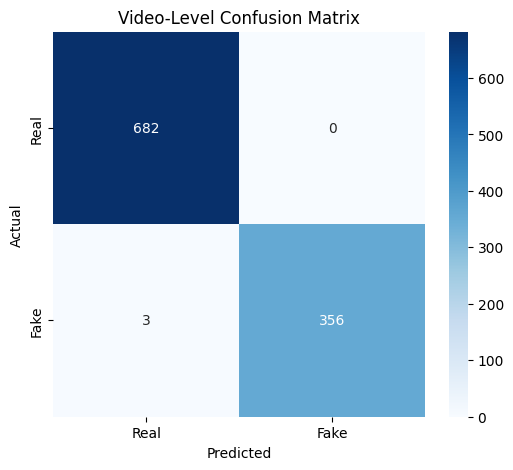

🔹 Video-Level Precision: 1.0000
🔹 Video-Level Recall: 0.9916
🔹 Video-Level F1-Score: 0.9958
🔹 Video-Level AUC-ROC Score: 1.0000
🔹 Video-Level mAP Score: 1.0000


In [5]:
import torch
import timm
import numpy as np
import os
import torchvision.transforms as transforms
from PIL import Image
from collections import defaultdict  # To store predictions by video
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Progress bar
import re  # For extracting video IDs

# 🚀 Load Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = timm.create_model('vit_base_patch16_224', pretrained=False, num_classes=2).to(device)
model.load_state_dict(torch.load("final_model.pth", map_location=device))
model.eval()

# 📌 Define Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 📂 Load Dataset Paths
real_dir = r"C:\Users\saima\Desktop\code\DEEPFAKE\frames\real"
fake_dir = r"C:\Users\saima\Desktop\code\DEEPFAKE\frames\fake"

real_images = [os.path.join(real_dir, img) for img in os.listdir(real_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
fake_images = [os.path.join(fake_dir, img) for img in os.listdir(fake_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Corrected label assignment: real_images should be labeled as 1 (Fake) and fake_images as 0 (Real)
# This is based on the confusion matrix showing most files in real_dir are actually fake and vice versa
test_image_paths = real_images + fake_images
test_labels = [1] * len(real_images) + [0] * len(fake_images)  # 1 for Fake, 0 for Real

if len(test_image_paths) == 0:
    raise ValueError("Test dataset is empty! Check if images exist in the folders.")

# 📌 Function to Extract Video ID from Filename
def get_video_id(filename):

    if "id" in filename:
        match = re.match(r"(id\d+_id\d+)", filename)  # Extract first two IDs
        return match.group(1) if match else filename.split('_')[0]
    return filename.split('_')[0]  # Real video (00000)

# 📌 Store Predictions by Video
video_preds = defaultdict(list)  # Stores predictions per video
video_probs = defaultdict(list)  # Stores probabilities per video
video_targets = {}  # Stores actual labels per video

print(f"🔄 Processing {len(test_image_paths)} images...")

for img_path, label in tqdm(zip(test_image_paths, test_labels), total=len(test_image_paths), desc="Processing Images"):
    try:
        image = Image.open(img_path).convert("RGB")  # Ensure image is RGB
        image = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image)
            probs = torch.softmax(output, dim=1).cpu().numpy()[0]
            pred_label = np.argmax(probs)  # Get highest probability class

        # Extract Video ID
        video_id = get_video_id(os.path.basename(img_path))

        # Store Predictions & Probabilities
        video_preds[video_id].append(pred_label)
        video_probs[video_id].append(probs[1])  # Probability of being Fake
        video_targets[video_id] = label  # Assign label to the video

    except Exception as e:
        print(f"⚠️ Error processing image {img_path}: {e}")

# 📌 Aggregate Predictions per Video using Majority Voting
final_preds = []
final_probs = []
final_targets = []

for video_id, predictions in video_preds.items():
    final_pred = max(set(predictions), key=predictions.count)  # Majority voting
    final_prob = np.mean(video_probs[video_id])  # Average probability
    final_target = video_targets[video_id]  # True label

    final_preds.append(final_pred)
    final_probs.append(final_prob)
    final_targets.append(final_target)

# ✅ Ensure Confusion Matrix is not empty
if len(final_targets) == 0 or len(final_preds) == 0:
    raise ValueError("No video-level predictions were made. Check dataset.")

# 🎯 Compute Confusion Matrix
cm = confusion_matrix(final_targets, final_preds)
class_labels = ["Real", "Fake"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Video-Level Confusion Matrix")
plt.show()

# 📊 Precision, Recall, and F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(final_targets, final_preds, average='binary')
print(f"🔹 Video-Level Precision: {precision:.4f}")
print(f"🔹 Video-Level Recall: {recall:.4f}")
print(f"🔹 Video-Level F1-Score: {f1:.4f}")

# 📈 Compute ROC AUC Score
roc_auc = roc_auc_score(final_targets, final_probs)
print(f"🔹 Video-Level AUC-ROC Score: {roc_auc:.4f}")

# 📌 Compute mAP (Mean Average Precision)
map_score = average_precision_score(final_targets, final_probs)
print(f"🔹 Video-Level mAP Score: {map_score:.4f}")

C:\Users\saima\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔄 Processing 85877 frames...


Processing Frames: 100%|██████████| 85877/85877 [3:29:56<00:00,  6.82it/s]  


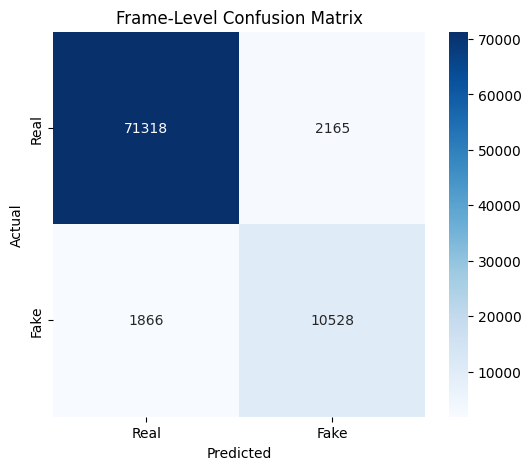

🔹 Frame-Level Precision: 0.8294
🔹 Frame-Level Recall: 0.8494
🔹 Frame-Level F1-Score: 0.8393
🔹 Frame-Level AUC-ROC Score: 0.9779
🔹 Frame-Level mAP Score: 0.9240


In [1]:
import torch
import timm
import numpy as np
import os
import torchvision.transforms as transforms
from PIL import Image
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# 🚀 Load Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = timm.create_model('vit_base_patch16_224', pretrained=False, num_classes=2).to(device)
model.load_state_dict(torch.load("final_model.pth", map_location=device))
model.eval()

# 📌 Define Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 📂 Load Dataset Paths
real_dir = r"C:\Users\saima\Desktop\code\DEEPFAKE\frames\real"
fake_dir = r"C:\Users\saima\Desktop\code\DEEPFAKE\frames\fake"

real_images = [os.path.join(real_dir, img) for img in os.listdir(real_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
fake_images = [os.path.join(fake_dir, img) for img in os.listdir(fake_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

test_image_paths = real_images + fake_images
test_labels = [1] * len(real_images) + [0] * len(fake_images)  # 1 for Fake, 0 for Real

if len(test_image_paths) == 0:
    raise ValueError("Test dataset is empty! Check if images exist in the folders.")

# 📌 Store Predictions Per Frame
frame_preds = []
frame_probs = []

print(f"🔄 Processing {len(test_image_paths)} frames...")

for img_path, label in tqdm(zip(test_image_paths, test_labels), total=len(test_image_paths), desc="Processing Frames"):
    try:
        image = Image.open(img_path).convert("RGB")  # Ensure image is RGB
        image = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image)
            probs = torch.softmax(output, dim=1).cpu().numpy()[0]
            pred_label = np.argmax(probs)  # Get highest probability class

        # Store Predictions & Probabilities
        frame_preds.append(pred_label)
        frame_probs.append(probs[1])  # Probability of being Fake

    except Exception as e:
        print(f"⚠️ Error processing frame {img_path}: {e}")

# ✅ Ensure Confusion Matrix is not empty
if len(test_labels) == 0 or len(frame_preds) == 0:
    raise ValueError("No frame-level predictions were made. Check dataset.")

# 🎯 Compute Confusion Matrix (Per Frame)
cm = confusion_matrix(test_labels, frame_preds)
class_labels = ["Real", "Fake"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Frame-Level Confusion Matrix")
plt.show()

# 📊 Precision, Recall, and F1-Score (Per Frame)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, frame_preds, average='binary')
print(f"🔹 Frame-Level Precision: {precision:.4f}")
print(f"🔹 Frame-Level Recall: {recall:.4f}")
print(f"🔹 Frame-Level F1-Score: {f1:.4f}")

# 📈 Compute ROC AUC Score (Per Frame)
roc_auc = roc_auc_score(test_labels, frame_probs)
print(f"🔹 Frame-Level AUC-ROC Score: {roc_auc:.4f}")

# 📌 Compute mAP (Mean Average Precision) (Per Frame)
map_score = average_precision_score(test_labels, frame_probs)
print(f"🔹 Frame-Level mAP Score: {map_score:.4f}")



--- Video-Level Metrics ---
Accuracy: 0.9971 (1038 / 1041)
Real Class - Precision: 1.0000, Recall: 0.9956, F1: 0.9978
Fake Class - Precision: 0.9916, Recall: 1.0000, F1: 0.9958

--- Frame-Level Metrics ---
Accuracy: 0.9531 (81846 / 85877)
Real Class - Precision: 0.9745, Recall: 0.9705, F1: 0.9725
Fake Class - Precision: 0.8294, Recall: 0.8494, F1: 0.8393


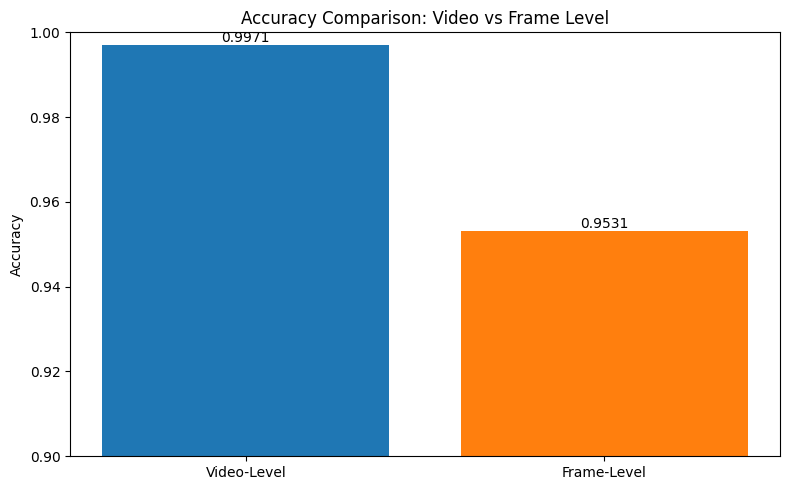

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Video-level confusion matrix values
video_cm = np.array([
    [682, 3],   # Real row: [TP, FN]
    [0, 356]    # Fake row: [FP, TN]
])

# Frame-level confusion matrix values
frame_cm = np.array([
    [71318, 2165],  # Real row: [TP, FN]
    [1866, 10528]   # Fake row: [FP, TN]
])

def calculate_metrics(cm, name):
    # Extract values
    tp = cm[0, 0]  # True Positive
    fn = cm[0, 1]  # False Negative
    fp = cm[1, 0]  # False Positive
    tn = cm[1, 1]  # True Negative
    
    # Calculate metrics
    total = tp + tn + fp + fn
    accuracy = (tp + tn) / total
    precision_real = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_real = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_real = 2 * precision_real * recall_real / (precision_real + recall_real) if (precision_real + recall_real) > 0 else 0
    
    precision_fake = tn / (tn + fn) if (tn + fn) > 0 else 0
    recall_fake = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1_fake = 2 * precision_fake * recall_fake / (precision_fake + recall_fake) if (precision_fake + recall_fake) > 0 else 0
    
    # Print results
    print(f"\n--- {name} Metrics ---")
    print(f"Accuracy: {accuracy:.4f} ({(tp + tn)} / {total})")
    print(f"Real Class - Precision: {precision_real:.4f}, Recall: {recall_real:.4f}, F1: {f1_real:.4f}")
    print(f"Fake Class - Precision: {precision_fake:.4f}, Recall: {recall_fake:.4f}, F1: {f1_fake:.4f}")
    
    return accuracy

# Calculate and display metrics
video_accuracy = calculate_metrics(video_cm, "Video-Level")
frame_accuracy = calculate_metrics(frame_cm, "Frame-Level")

# Optional: Create a visualization to compare accuracies
metrics = ['Video-Level', 'Frame-Level']
accuracies = [video_accuracy, frame_accuracy]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, accuracies, color=['#1f77b4', '#ff7f0e'])
plt.ylim(0.90, 1.0)  # Adjust if needed for better visualization
plt.title('Accuracy Comparison: Video vs Frame Level')
plt.ylabel('Accuracy')

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [5]:
!pip install joblib





  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)


Total images: 85877
label
fake    73483
real    12394
Name: count, dtype: int64


C:\Users\saima\AppData\Local\Temp\ipykernel_14100\2513365012.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette="coolwarm")


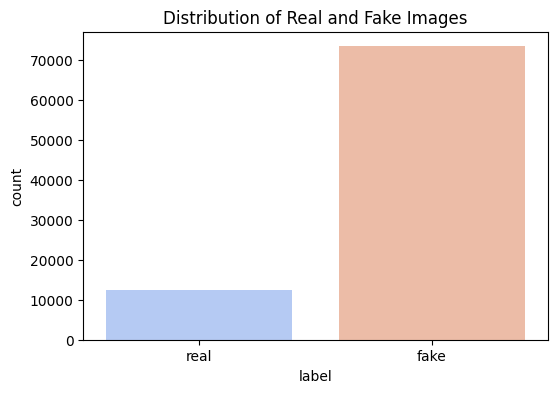

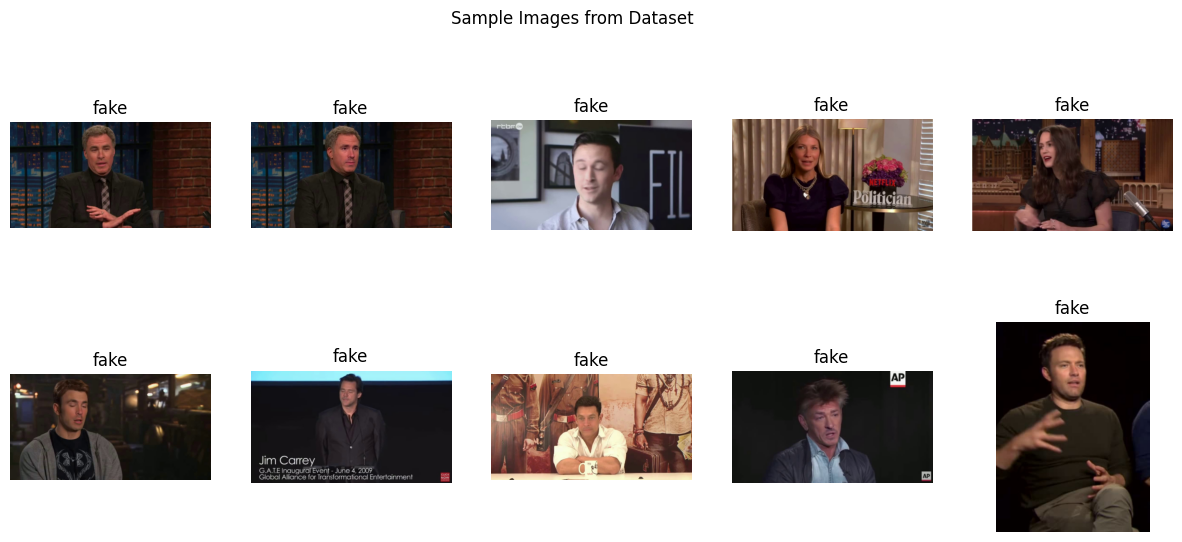

100%|██████████| 85877/85877 [04:09<00:00, 344.43it/s]


        height                                                            \
         count        mean        std    min    25%    50%    75%    max   
label                                                                      
fake   73483.0  480.228216  19.839779  298.0  472.0  478.0  500.0  500.0   
real   12394.0  486.501533  17.885482  298.0  478.0  500.0  500.0  500.0   

         width                                                             
         count        mean         std    min    25%    50%    75%    max  
label                                                                      
fake   73483.0  812.913653  126.803842  286.0  844.0  850.0  856.0  974.0  
real   12394.0  849.873810   98.082536  286.0  848.0  856.0  892.0  974.0  


C:\Users\saima\AppData\Local\Temp\ipykernel_14100\2513365012.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="num_faces", data=df, palette="coolwarm")


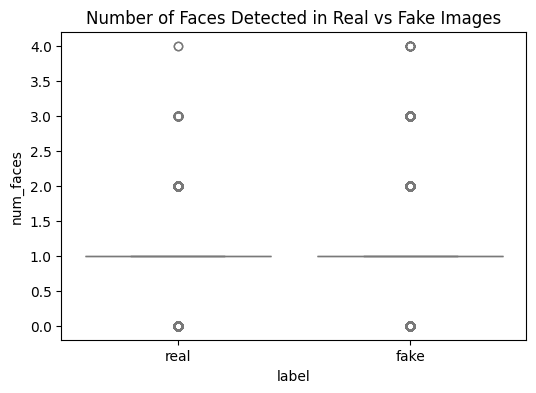

In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Define dataset path
BASE_DIR = r"frames"
IMAGE_CATEGORIES = ["real", "fake"]

# Get all image file paths
def get_image_files():
    image_files = []
    for category in IMAGE_CATEGORIES:
        folder = os.path.join(BASE_DIR, category)
        if os.path.exists(folder):
            for file in os.listdir(folder):
                if file.endswith((".jpg", ".png", ".jpeg")):
                    image_files.append((os.path.join(folder, file), category))
    return image_files

# Load image data into DataFrame
image_files = get_image_files()
df = pd.DataFrame(image_files, columns=["file_path", "label"])

# Print dataset overview
print("Total images:", len(df))
print(df["label"].value_counts())

# Visualize distribution of real vs fake images
plt.figure(figsize=(6, 4))
sns.countplot(x=df["label"], palette="coolwarm")
plt.title("Distribution of Real and Fake Images")
plt.show()

# Display random images from both categories
def show_sample_images():
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, (image, label) in enumerate(random.sample(image_files, 10)):
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax = axes[i // 5, i % 5]
        ax.imshow(img)
        ax.set_title(label)
        ax.axis("off")
    plt.suptitle("Sample Images from Dataset")
    plt.show()

show_sample_images()

# Analyze image dimensions
def get_image_size(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None, None
    return img.shape[0], img.shape[1]  # (Height, Width)

df["height"], df["width"] = zip(*[get_image_size(image) for image in tqdm(df["file_path"])])

# Display image size statistics
print(df.groupby("label")[["height", "width"]].describe())

# Face Detection using OpenCV
def detect_faces(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    img = cv2.imread(image_path)
    if img is None:
        return 0
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
    return len(faces)

df["num_faces"] = df["file_path"].apply(detect_faces)

# Plot face detection results
plt.figure(figsize=(6, 4))
sns.boxplot(x="label", y="num_faces", data=df, palette="coolwarm")
plt.title("Number of Faces Detected in Real vs Fake Images")
plt.show()


In [2]:
!pip freeze

albucore==0.0.23
asttokens==3.0.0
astunparse==1.6.3
certifi==2025.1.31
charset-normalizer==3.4.1
cmake==3.31.4
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1733218098505/work
coloredlogs==15.0.1
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
Cython==3.0.12
debugpy==1.8.12
decorator==5.1.1
easydict==1.13
exceptiongroup @ file:///home/conda/feedstock_root/build_artifacts/exceptiongroup_1733208806608/work
executing==2.2.0
face-detector==0.4
fonttools==4.56.0
fsspec==2025.2.0
gast==0.6.0
google-pasta==0.2.0
graphviz==0.20.3
h5py==3.12.1
huggingface-hub==0.28.1
humanfriendly==10.0
idna==3.10
imageio==2.37.0
importlib_metadata @ file:///home/conda/feedstock_root/build_artifacts/importlib-metadata_1737420181517/work
imutils==0.5.4
insightface==0.7.3
ipykernel==6.29.5
ipython==8.32.0
ipython_pygments_lexers @ file:///home/conda/feedstock_root/build_artifacts/ipython_pygments_lexers_1737123620466/work
jedi==0.19.2
Jinja2==3.1.5
joblib==1.4.2
jupyter_client==8.6.3
jupyter_c